In [350]:
import pandas as pd
import numpy as np
import seaborn as sns

In [351]:
df = pd.read_csv('HousePrices.csv')

In [352]:
df.head()

,Id,Dwell_Type,Zone_Class,LotFrontage,LotArea,Road_Type,Alley,Property_Shape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Property_Sale_Price
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### EDA

In [353]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2073 entries, 0 to 2072
Data columns (total 81 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2073 non-null   int64  
 1   Dwell_Type           2073 non-null   int64  
 2   Zone_Class           2073 non-null   object 
 3   LotFrontage          1753 non-null   float64
 4   LotArea              2073 non-null   int64  
 5   Road_Type            2073 non-null   object 
 6   Alley                129 non-null    object 
 7   Property_Shape       2073 non-null   object 
 8   LandContour          2073 non-null   object 
 9   Utilities            2073 non-null   object 
 10  LotConfig            2073 non-null   object 
 11  LandSlope            2073 non-null   object 
 12  Neighborhood         2073 non-null   object 
 13  Condition1           2073 non-null   object 
 14  Condition2           2073 non-null   object 
 15  Dwelling_Type        2073 non-null   o

In [354]:
#Removing Alley, PoolQC, Fence, and MiscFeature columns because of high number of null values
df.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], axis = 1, inplace = True)

In [355]:
df.Id.unique()

array([   1,    2,    3, ..., 1818, 1819, 1820], dtype=int64)

In [356]:
#We can drop Id column because it has no relation with the Property sale Price
df.drop('Id', axis = 1, inplace = True)

In [357]:
df['Dwell_Type'].unique()

array([  60,   20,   70,   50,  190,   45,   90,  120,   30,   85,   80,
        160,   75,  180,   40,  150,  303, 7080], dtype=int64)

In [358]:
df['Dwell_Type'].value_counts()

20      722
60      431
50      205
30      133
120     114
90       91
160      78
80       78
70       77
190      42
85       34
75       19
180      14
150      13
45       13
40        7
303       1
7080      1
Name: Dwell_Type, dtype: int64

In [359]:
#There should not be a dwell type 7080, and 303 as it is not given in the variable description
df['Dwell_Type'].replace([7080, 303], np.nan, inplace = True)

In [360]:
df = df[df['Dwell_Type'].notna()]

In [361]:
df['Dwell_Type'].shape

(2071,)

<AxesSubplot:xlabel='Dwell_Type', ylabel='Property_Sale_Price'>

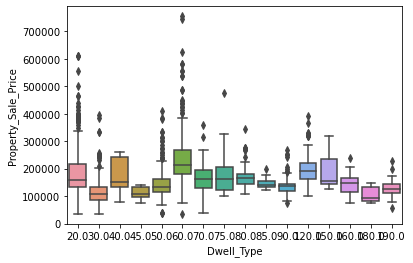

In [362]:
sns.boxplot(x = 'Dwell_Type', y = 'Property_Sale_Price', data = df)

In [554]:
df.drop('Dwell_Type', axis = 1, inplace = True)

In [363]:
df['Zone_Class'].unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

<AxesSubplot:xlabel='Zone_Class', ylabel='Property_Sale_Price'>

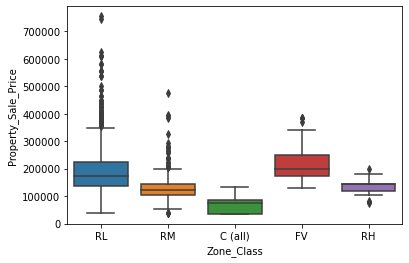

In [364]:
sns.boxplot(x = 'Zone_Class', y = 'Property_Sale_Price', data = df)

In [562]:
df.drop('Zone_Class', axis = 1, inplace = True)

In [365]:
df['LotFrontage'].unique()

array([ 65.,  80.,  68.,  60.,  84.,  85.,  75.,  nan,  51.,  50.,  70.,
        91.,  72.,  66., 101.,  57.,  44., 110.,  98.,  47., 108., 112.,
        74., 115.,  61.,  48.,  33.,  52., 100.,  24.,  89.,  63.,  76.,
        81.,  95.,  69.,  21.,  32.,  78., 121., 122.,  40., 105.,  73.,
        77.,  64.,  94.,  34.,  90.,  55.,  88.,  82.,  71., 120., 107.,
        92., 134.,  62.,  86., 141.,  97.,  54.,  41.,  79., 174.,  99.,
        67.,  83.,  43., 103.,  93.,  30., 129., 140.,  35.,  37., 118.,
        87., 116., 150., 111.,  49.,  96.,  59.,  36.,  56., 102.,  58.,
        38., 109., 130.,  53., 137.,  45., 106., 104.,  42.,  39., 144.,
       114., 128., 149., 313., 168., 182., 138., 160., 152., 124., 153.,
        46.])

<AxesSubplot:xlabel='LotFrontage', ylabel='Property_Sale_Price'>

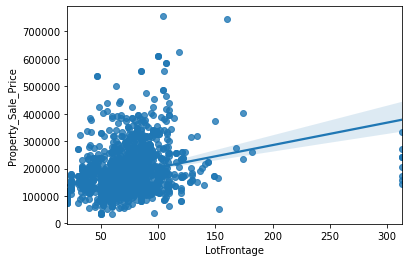

In [366]:
#Not a great correlation
sns.regplot(x = 'LotFrontage', y = 'Property_Sale_Price', data = df)

In [367]:
df.corr()

,Dwell_Type,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Property_Sale_Price
Dwell_Type,1.000000,-0.290370,-0.117693,0.033342,-0.009324,0.007739,0.040529,0.019278,-0.048239,-0.073222,...,-0.038494,-0.004666,0.004637,-0.036377,-0.023365,0.011351,-0.007305,-0.010553,-0.000187,-0.078439
LotFrontage,-0.290370,1.000000,0.311504,0.110045,-0.013290,0.092646,0.100477,0.127071,0.140395,0.062771,...,0.082989,0.106802,-0.002010,0.043113,0.021743,0.124246,-0.004979,0.024757,0.024893,0.279260
LotArea,-0.117693,0.311504,1.000000,0.078361,0.014471,-0.010464,0.017930,0.064657,0.164949,0.075844,...,0.121563,0.064396,-0.023243,0.010581,0.035339,0.062451,0.030938,-0.001744,-0.006377,0.211685
OverallQual,0.033342,0.110045,0.078361,1.000000,-0.009872,0.335080,0.379777,0.287667,0.163960,-0.058175,...,0.154400,0.217309,-0.080270,0.000471,0.021636,0.045209,-0.034236,0.034674,-0.021313,0.524946
OverallCond,-0.009324,-0.013290,0.014471,-0.009872,1.000000,-0.247127,0.082059,-0.086603,-0.034080,0.027640,...,0.014152,-0.042582,0.045259,0.017602,0.012555,-0.016909,0.042089,-0.024977,0.033492,-0.051201
YearBuilt,0.007739,0.092646,-0.010464,0.335080,-0.247127,1.000000,0.535738,0.264528,0.208817,-0.027017,...,0.180286,0.179890,-0.322075,0.034148,-0.048981,0.005834,-0.038567,0.028223,-0.006838,0.437706
YearRemodAdd,0.040529,0.100477,0.017930,0.379777,0.082059,0.535738,1.000000,0.166004,0.102701,-0.073631,...,0.182955,0.221593,-0.177464,0.040110,-0.036538,-0.009541,-0.011647,0.034030,0.057961,0.475496
MasVnrArea,0.019278,0.127071,0.064657,0.287667,-0.086603,0.264528,0.166004,1.000000,0.240347,-0.079568,...,0.124921,0.141512,-0.097460,0.029974,0.064075,0.003016,-0.035322,-0.018473,0.019057,0.481873
BsmtFinSF1,-0.048239,0.140395,0.164949,0.163960,-0.034080,0.208817,0.102701,0.240347,1.000000,-0.061050,...,0.207373,0.107789,-0.089706,0.045008,0.046595,0.099492,-0.001608,-0.019531,0.031049,0.374040
BsmtFinSF2,-0.073222,0.062771,0.075844,-0.058175,0.027640,-0.027017,-0.073631,-0.079568,-0.061050,1.000000,...,0.073768,-0.001655,0.058012,-0.030374,0.099500,0.027038,-0.002232,-0.016650,0.025768,-0.028895


In [368]:
df['LotArea'].unique()

array([ 8450,  9600, 11250, ..., 10353, 11291,  9004], dtype=int64)

<AxesSubplot:xlabel='LotArea', ylabel='Property_Sale_Price'>

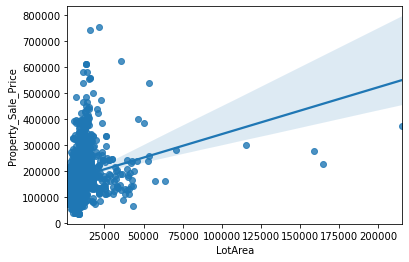

In [369]:
#Not a great relation
sns.regplot(x = 'LotArea', y = 'Property_Sale_Price', data = df)

In [370]:
df.drop('LotArea', axis = 1, inplace = True)

In [371]:
df.columns

Index(['Dwell_Type', 'Zone_Class', 'LotFrontage', 'Road_Type',
       'Property_Shape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'Dwelling_Type',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDe

In [372]:
df['Road_Type'].unique()

array(['Pave', 'Grvl'], dtype=object)

<AxesSubplot:xlabel='Road_Type', ylabel='Property_Sale_Price'>

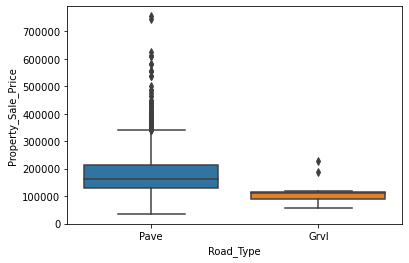

In [373]:
#Paved road type usually has high price, so a good predictor
sns.boxplot(x = 'Road_Type', y = 'Property_Sale_Price', data = df)

In [374]:
df['Property_Shape'].unique()

array(['Reg', 'IR1', 'IR2', 'IR3'], dtype=object)

<AxesSubplot:xlabel='Property_Shape', ylabel='Property_Sale_Price'>

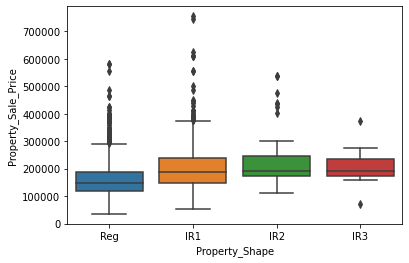

In [375]:
#Not a great predictor
sns.boxplot(x = 'Property_Shape', y = 'Property_Sale_Price', data = df)

In [376]:
df.drop('Property_Shape', axis = 1, inplace = True)

In [377]:
df['LandContour'].unique()

array(['Lvl', 'Bnk', 'Low', 'HLS'], dtype=object)

<AxesSubplot:xlabel='LandContour', ylabel='Property_Sale_Price'>

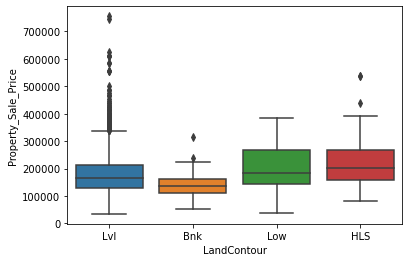

In [378]:
#Not a great Predictor 
sns.boxplot(x = 'LandContour', y = 'Property_Sale_Price', data = df)

In [379]:
df.drop('LandContour', axis = 1, inplace = True)

In [380]:
df['Utilities'].unique()

array(['AllPub', 'NoSeWa'], dtype=object)

<AxesSubplot:xlabel='Utilities', ylabel='Property_Sale_Price'>

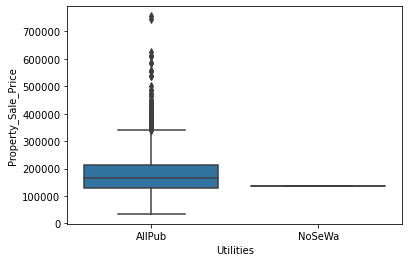

In [381]:

sns.boxplot(x = 'Utilities', y = 'Property_Sale_Price', data = df)

In [382]:
#Not a good preditor because most of the values are of one type
df['Utilities'].value_counts()

AllPub    2068
NoSeWa       3
Name: Utilities, dtype: int64

In [383]:
df.drop('Utilities', axis = 1, inplace = True)

In [384]:
df['LotConfig'].unique()

array(['Inside', 'FR2', 'Corner', 'CulDSac', 'FR3'], dtype=object)

<AxesSubplot:xlabel='LotConfig', ylabel='Property_Sale_Price'>

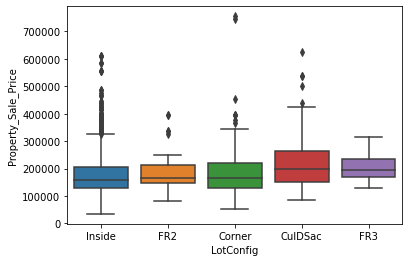

In [385]:
#Not a good predictor
sns.boxplot(x = 'LotConfig', y = 'Property_Sale_Price', data = df)

In [386]:
df.drop('LotConfig', axis = 1, inplace = True)

In [387]:
df['LandSlope'].unique()

array(['Gtl', 'Mod', 'Sev'], dtype=object)

<AxesSubplot:xlabel='LandSlope', ylabel='Property_Sale_Price'>

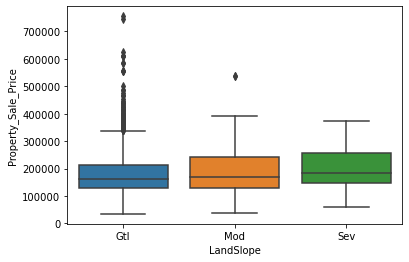

In [388]:
#Not a good predictor
sns.boxplot(x = 'LandSlope', y = 'Property_Sale_Price', data = df)

In [389]:
df.drop('LandSlope', axis = 1, inplace = True)

In [390]:
df.columns

Index(['Dwell_Type', 'Zone_Class', 'LotFrontage', 'Road_Type', 'Neighborhood',
       'Condition1', 'Condition2', 'Dwelling_Type', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'Pool

In [391]:
df['Neighborhood'].unique()

array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
       'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
       'Blueste'], dtype=object)

<AxesSubplot:xlabel='Neighborhood', ylabel='Property_Sale_Price'>

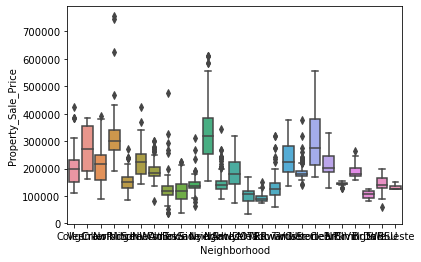

In [392]:
#Allright predictor
sns.boxplot(x = 'Neighborhood', y = 'Property_Sale_Price', data = df)


In [525]:
df.drop('Neighborhood', axis = 1, inplace = True)

In [393]:
df['Condition1'].unique()

array(['Norm', 'Feedr', 'PosN', 'Artery', 'RRAe', 'RRNn', 'RRAn', 'PosA',
       'RRNe'], dtype=object)

<AxesSubplot:xlabel='Condition1', ylabel='Property_Sale_Price'>

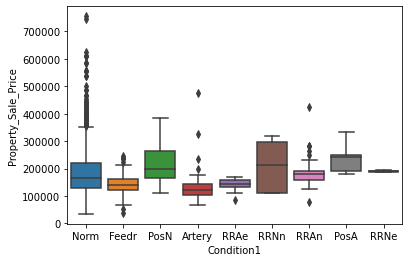

In [394]:
#Not a great predictor
sns.boxplot(x = 'Condition1', y = 'Property_Sale_Price', data = df)

In [395]:
df.drop('Condition1', axis = 1, inplace = True)

In [396]:
df.drop('Condition2', axis = 1, inplace = True)

In [397]:
df['Dwelling_Type'].unique()

array(['1Fam', '2fmCon', 'Duplex', 'TwnhsE', 'Twnhs'], dtype=object)

<AxesSubplot:xlabel='Dwelling_Type', ylabel='Property_Sale_Price'>

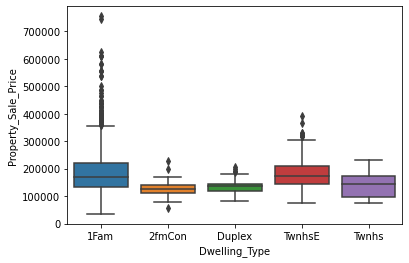

In [398]:
#Not a good preditor
sns.boxplot(x = 'Dwelling_Type', y = 'Property_Sale_Price', data = df)

In [399]:
df.drop('Dwelling_Type', axis = 1, inplace = True)

In [400]:
df['HouseStyle'].unique()

array(['2Story', '1Story', '1.5Fin', '1.5Unf', 'SFoyer', 'SLvl', '2.5Unf',
       '2.5Fin'], dtype=object)

<AxesSubplot:xlabel='HouseStyle', ylabel='Property_Sale_Price'>

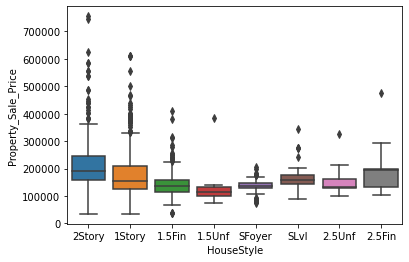

In [401]:
#Good enough
sns.boxplot(x = 'HouseStyle', y = 'Property_Sale_Price', data = df)

In [402]:
df['OverallQual'].unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2], dtype=int64)

<AxesSubplot:xlabel='OverallQual', ylabel='Property_Sale_Price'>

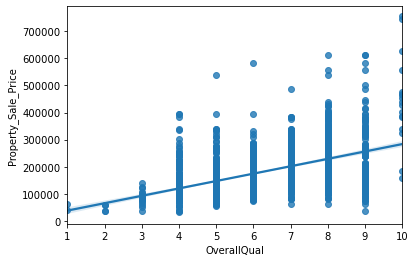

In [403]:
#Good Preditor
sns.regplot(x = 'OverallQual', y = 'Property_Sale_Price', data = df)

In [404]:
df['OverallCond'].unique()

array([5, 8, 6, 7, 4, 2, 3, 9, 1], dtype=int64)

<AxesSubplot:xlabel='OverallCond', ylabel='Property_Sale_Price'>

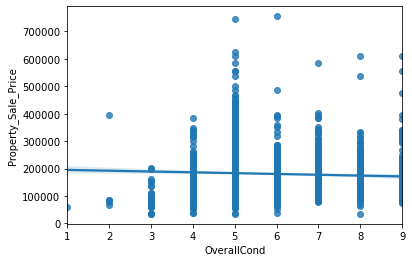

In [405]:
#Not a Good predictor
sns.regplot(x = 'OverallCond', y = 'Property_Sale_Price', data = df)

In [406]:
df.drop('OverallCond', axis = 1, inplace = True)

In [407]:
df['YearBuilt'].unique()

array([2003, 1976, 2001, 1915, 2000, 1993, 2004, 1973, 1931, 1939, 1965,
       2005, 1962, 2006, 1960, 1929, 1970, 1967, 1958, 1930, 2002, 1968,
       2007, 1951, 1957, 1927, 1920, 1966, 1959, 1994, 1954, 1953, 1955,
       1983, 1975, 1997, 1934, 1963, 1981, 1964, 1999, 1972, 1921, 1945,
       1982, 1998, 1956, 1948, 1910, 1995, 1991, 2009, 1950, 1961, 1977,
       1985, 1979, 1885, 1919, 1990, 1969, 1935, 1988, 1971, 1952, 1936,
       1923, 1924, 1984, 1926, 1940, 1941, 1987, 1986, 2008, 1908, 1892,
       1916, 1932, 1918, 1912, 1947, 1925, 1900, 1980, 1989, 1992, 1949,
       1880, 1928, 1978, 1922, 1996, 2010, 1946, 1913, 1937, 1942, 1938,
       1974, 1893, 1914, 1906, 1890, 1898, 1904, 1882, 1875, 1911, 1917,
       1872, 1905, 1902, 1943, 1944, 1909, 1903], dtype=int64)

<AxesSubplot:xlabel='YearBuilt', ylabel='Property_Sale_Price'>

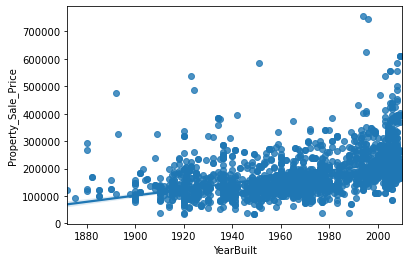

In [408]:
#We can take this if we want as predictor
sns.regplot(x = 'YearBuilt', y = 'Property_Sale_Price', data = df)

In [409]:
df.drop('YearBuilt', axis = 1, inplace = True)

In [410]:
df['YearRemodAdd'].unique()

array([2003, 1976, 2002, 1970, 2000, 1995, 2005, 1973, 1950, 1965, 2006,
       1962, 2007, 1960, 2001, 1967, 2004, 2008, 1997, 1959, 1990, 1955,
       1983, 1980, 1966, 1963, 1987, 1964, 1972, 1996, 1998, 1989, 1953,
       1956, 1968, 1981, 1992, 2009, 1982, 1961, 1993, 1999, 1985, 1979,
       1977, 1969, 1958, 1991, 1971, 1952, 1975, 2010, 1984, 1986, 1994,
       1988, 1954, 1957, 1951, 1978, 1974, 2017, 2011, 2014, 2016, 2020,
       2012, 2018, 2015, 2023, 2022, 2019], dtype=int64)

<AxesSubplot:xlabel='YearRemodAdd', ylabel='Property_Sale_Price'>

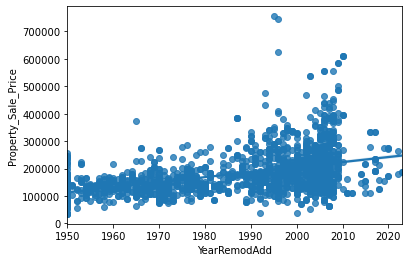

In [411]:
#Not really a Good predctor
sns.regplot(x = 'YearRemodAdd', y = 'Property_Sale_Price', data = df)

In [412]:
df.drop('YearRemodAdd', axis = 1, inplace = True)

In [413]:
df['RoofStyle'].unique()

array(['Gable', 'Hip', 'Gambrel', 'Mansard', 'Flat', 'Shed'], dtype=object)

<AxesSubplot:xlabel='RoofStyle', ylabel='Property_Sale_Price'>

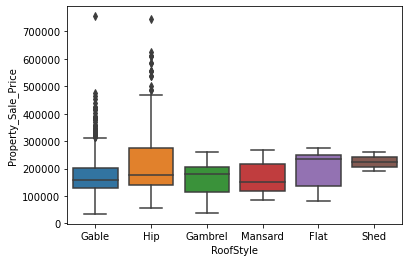

In [414]:
#Not great Predictor
sns.boxplot(x = 'RoofStyle', y = 'Property_Sale_Price', data = df)

In [415]:
df.drop('RoofStyle', axis = 1, inplace = True)

In [416]:
df['RoofMatl'].unique()

array(['CompShg', 'WdShngl', 'Metal', 'WdShake', 'Membran', 'Tar&Grv',
       'Roll', 'ClyTile'], dtype=object)

<AxesSubplot:xlabel='RoofMatl', ylabel='Property_Sale_Price'>

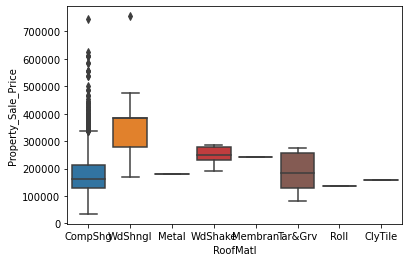

In [417]:

sns.boxplot(x = 'RoofMatl', y = 'Property_Sale_Price', data = df)

In [418]:
#Not great
df['RoofMatl'].value_counts()

CompShg    2034
Tar&Grv      17
WdShngl      10
WdShake       6
ClyTile       1
Roll          1
Membran       1
Metal         1
Name: RoofMatl, dtype: int64

In [419]:
df.drop('RoofMatl', axis = 1, inplace = True)

In [420]:
df['Exterior1st'].unique()

array(['VinylSd', 'MetalSd', 'Wd Sdng', 'HdBoard', 'BrkFace', 'WdShing',
       'CemntBd', 'Plywood', 'AsbShng', 'Stucco', 'BrkComm', 'AsphShn',
       'Stone', 'ImStucc', 'CBlock'], dtype=object)

<AxesSubplot:xlabel='Exterior1st', ylabel='Property_Sale_Price'>

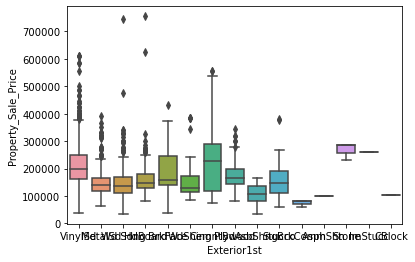

In [421]:
#Not great
sns.boxplot(x = 'Exterior1st', y = 'Property_Sale_Price', data = df)

In [422]:
df.drop('Exterior1st', axis = 1, inplace = True)

In [423]:
df.drop('Exterior2nd', axis = 1, inplace = True)

In [424]:
df['MasVnrType'].unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn', nan], dtype=object)

<AxesSubplot:xlabel='MasVnrType', ylabel='Property_Sale_Price'>

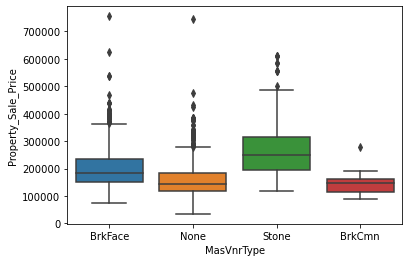

In [425]:
#Good enough
sns.boxplot(x = 'MasVnrType', y = 'Property_Sale_Price', data = df)

In [426]:
df['MasVnrArea'].unique()

array([1.960e+02, 0.000e+00, 1.620e+02, 3.500e+02, 1.860e+02, 2.400e+02,
       2.860e+02, 3.060e+02, 2.120e+02, 1.800e+02, 3.800e+02, 2.810e+02,
       6.400e+02, 2.000e+02, 2.460e+02, 1.320e+02, 6.500e+02, 7.500e+01,
       4.120e+02, 2.720e+02, 4.560e+02, 1.031e+03, 1.780e+02, 5.730e+02,
       3.440e+02, 2.870e+02, 1.670e+02, 1.115e+03, 4.400e+01, 1.040e+02,
       5.760e+02, 4.430e+02, 4.680e+02, 5.700e+01, 6.300e+01, 2.840e+02,
       4.700e+01, 2.030e+02, 7.700e+01, 1.830e+02, 4.100e+01, 6.900e+01,
       3.360e+02, 6.000e+02, 7.680e+02, 4.800e+02, 2.200e+02, 1.840e+02,
       1.129e+03, 1.160e+02, 1.350e+02, 2.660e+02, 5.800e+01, 3.090e+02,
       1.360e+02, 2.880e+02, 8.300e+01, 3.200e+02, 5.400e+01, 1.200e+02,
       4.360e+02, 2.520e+02, 3.800e+01, 6.640e+02, 2.260e+02, 3.000e+02,
       6.530e+02, 1.120e+02, 4.910e+02, 2.680e+02, 7.480e+02, 6.700e+01,
       2.750e+02, 1.380e+02, 2.500e+01, 2.050e+02, 2.620e+02, 1.280e+02,
       2.600e+02, 1.530e+02, 2.600e+01, 3.120e+02, 

<AxesSubplot:xlabel='MasVnrArea', ylabel='Property_Sale_Price'>

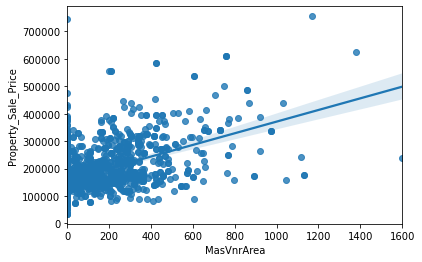

In [427]:
#ok predictor
sns.regplot(x = 'MasVnrArea', y = 'Property_Sale_Price', data = df)

In [428]:
df['ExterQual'].unique()

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

<AxesSubplot:xlabel='ExterQual', ylabel='Property_Sale_Price'>

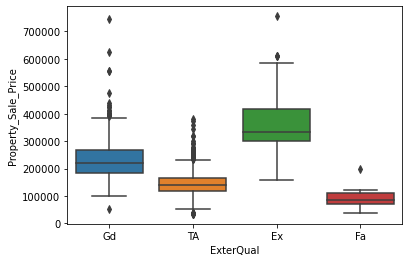

In [429]:
#Good Preditor
sns.boxplot(x = 'ExterQual', y = 'Property_Sale_Price', data = df)

In [430]:
df['ExterCond'].unique()

array(['TA', 'Gd', 'Fa', 'Po', 'Ex'], dtype=object)

<AxesSubplot:xlabel='ExterCond', ylabel='Property_Sale_Price'>

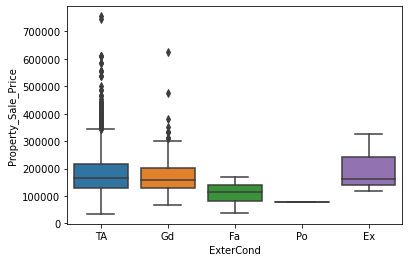

In [431]:
#Good Predictore
sns.boxplot(x = 'ExterCond', y = 'Property_Sale_Price', data = df)

In [432]:
df['ExterCond'].value_counts()

TA    1813
Gd     219
Fa      35
Ex       3
Po       1
Name: ExterCond, dtype: int64

In [433]:
df['Foundation'].unique()

array(['PConc', 'CBlock', 'BrkTil', 'Wood', 'Slab', 'Stone'], dtype=object)

<AxesSubplot:xlabel='Foundation', ylabel='Property_Sale_Price'>

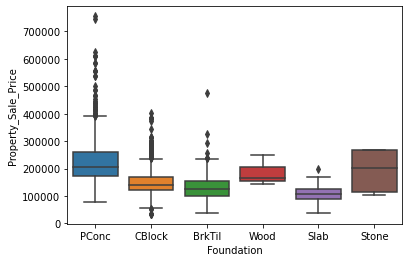

In [434]:
#Not Great
sns.boxplot(x = 'Foundation', y = 'Property_Sale_Price', data = df)

In [435]:
df.drop('Foundation', axis = 1, inplace = True)

In [436]:
#df['BsmtFinSF1'].unique()

<AxesSubplot:xlabel='BsmtFinSF1', ylabel='Property_Sale_Price'>

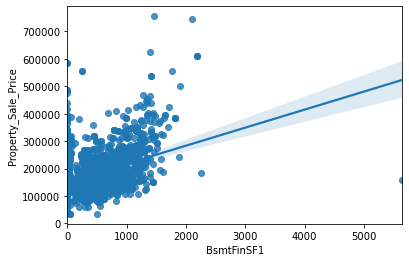

In [437]:
#Not Great
sns.regplot(x = 'BsmtFinSF1', y = 'Property_Sale_Price', data = df)

In [438]:
df.drop('BsmtFinSF1', axis = 1, inplace = True)

In [439]:
df.drop('BsmtFinSF2', axis = 1, inplace = True)

<AxesSubplot:xlabel='BsmtUnfSF', ylabel='Property_Sale_Price'>

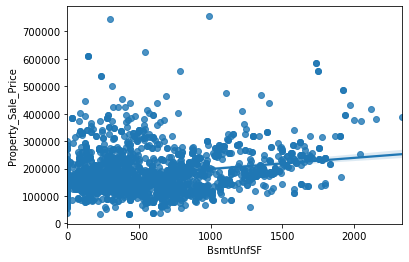

In [440]:
sns.regplot(x = 'BsmtUnfSF', y = 'Property_Sale_Price', data = df)

In [441]:
df.drop('BsmtUnfSF', axis = 1, inplace = True)

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='Property_Sale_Price'>

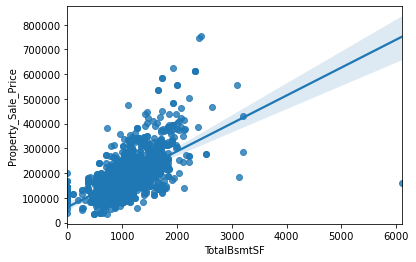

In [442]:
#great
sns.regplot(x = 'TotalBsmtSF', y = 'Property_Sale_Price', data = df)

<AxesSubplot:xlabel='Heating', ylabel='Property_Sale_Price'>

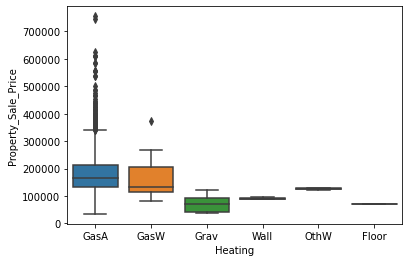

In [443]:
sns.boxplot(x = 'Heating', y = 'Property_Sale_Price', data = df)

In [444]:
df['Heating'].value_counts()

GasA     2023
GasW       25
Grav       10
Wall        8
Floor       3
OthW        2
Name: Heating, dtype: int64

In [445]:
df.drop('Heating', axis = 1, inplace = True)

In [446]:
df['CentralAir'].value_counts()

Y    1933
N     138
Name: CentralAir, dtype: int64

<AxesSubplot:xlabel='CentralAir', ylabel='Property_Sale_Price'>

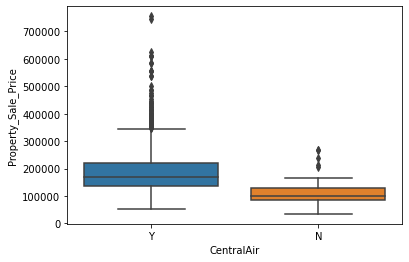

In [447]:
#Not Great predictor
sns.boxplot(x = 'CentralAir', y = 'Property_Sale_Price', data = df)

In [448]:
df.drop('CentralAir', axis = 1, inplace = True)

In [449]:
df['Electrical'].value_counts()

SBrkr    1899
FuseA     127
FuseF      40
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [450]:
df.drop('Electrical', axis = 1, inplace = True)

<AxesSubplot:xlabel='1stFlrSF', ylabel='Property_Sale_Price'>

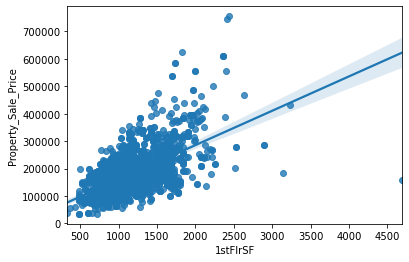

In [451]:
#Good
sns.regplot(x = '1stFlrSF', y = 'Property_Sale_Price', data = df)

<AxesSubplot:xlabel='2ndFlrSF', ylabel='Property_Sale_Price'>

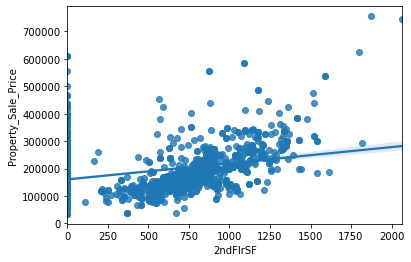

In [452]:
#Not Great
sns.regplot(x = '2ndFlrSF', y = 'Property_Sale_Price', data = df)

In [453]:
df.drop('2ndFlrSF', axis = 1, inplace = True)

<AxesSubplot:xlabel='LowQualFinSF', ylabel='Property_Sale_Price'>

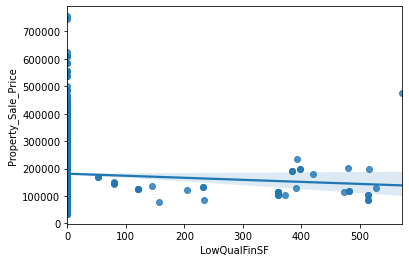

In [454]:
sns.regplot(x = 'LowQualFinSF', y = 'Property_Sale_Price', data = df)

In [455]:
df.drop('LowQualFinSF', axis = 1, inplace = True)

<AxesSubplot:xlabel='GrLivArea', ylabel='Property_Sale_Price'>

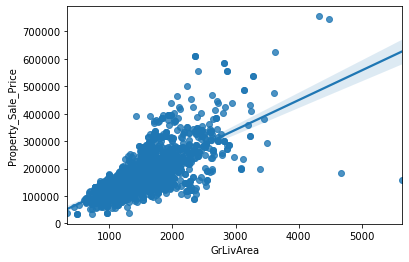

In [456]:
#Great
sns.regplot(x = 'GrLivArea', y = 'Property_Sale_Price', data = df)


<AxesSubplot:xlabel='BsmtFullBath', ylabel='Property_Sale_Price'>

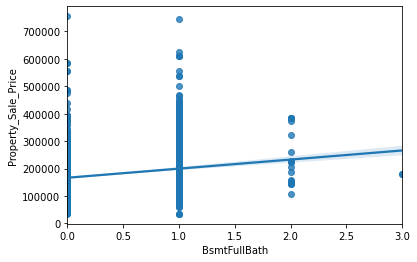

In [457]:
sns.regplot(x = 'BsmtFullBath', y = 'Property_Sale_Price', data = df)

In [458]:
df.drop('BsmtFullBath', axis = 1, inplace = True)

In [459]:
df.drop('BsmtHalfBath', axis = 1, inplace = True)

<AxesSubplot:xlabel='FullBath', ylabel='Property_Sale_Price'>

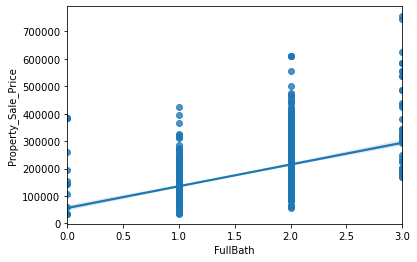

In [460]:
#Good
sns.regplot(x = 'FullBath', y = 'Property_Sale_Price', data = df)

In [461]:
df.corr()

,Dwell_Type,LotFrontage,OverallQual,MasVnrArea,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Property_Sale_Price
Dwell_Type,1.000000,-0.290370,0.033342,0.019278,-0.229835,-0.237715,0.078656,0.151025,0.154328,-0.033313,...,-0.038494,-0.004666,0.004637,-0.036377,-0.023365,0.011351,-0.007305,-0.010553,-0.000187,-0.078439
LotFrontage,-0.290370,1.000000,0.110045,0.127071,0.283855,0.356494,0.320824,0.175830,0.049289,0.228255,...,0.082989,0.106802,-0.002010,0.043113,0.021743,0.124246,-0.004979,0.024757,0.024893,0.279260
OverallQual,0.033342,0.110045,1.000000,0.287667,0.355887,0.310484,0.401647,0.382917,0.188821,0.059276,...,0.154400,0.217309,-0.080270,0.000471,0.021636,0.045209,-0.034236,0.034674,-0.021313,0.524946
MasVnrArea,0.019278,0.127071,0.287667,1.000000,0.345414,0.320490,0.389593,0.281490,0.206688,0.102326,...,0.124921,0.141512,-0.097460,0.029974,0.064075,0.003016,-0.035322,-0.018473,0.019057,0.481873
TotalBsmtSF,-0.229835,0.283855,0.355887,0.345414,1.000000,0.788935,0.424664,0.313792,-0.046043,0.023995,...,0.239743,0.264665,-0.082554,0.044999,0.079487,0.089854,-0.023138,0.015676,-0.013705,0.618681
1stFlrSF,-0.237715,0.356494,0.310484,0.320490,0.788935,1.000000,0.546321,0.370793,-0.133482,0.112559,...,0.240393,0.219536,-0.054331,0.061104,0.083245,0.111910,-0.028475,0.035276,0.003909,0.600057
GrLivArea,0.078656,0.320824,0.401647,0.389593,0.424664,0.546321,1.000000,0.616823,0.432062,0.517695,...,0.247752,0.331225,0.026306,0.026236,0.112301,0.143222,-0.000397,0.063639,-0.004661,0.711034
FullBath,0.151025,0.175830,0.382917,0.281490,0.313792,0.370793,0.616823,1.000000,0.136566,0.366307,...,0.156934,0.267798,-0.094954,0.038056,-0.024094,0.044756,-0.013154,0.052596,0.004994,0.549169
HalfBath,0.154328,0.049289,0.188821,0.206688,-0.046043,-0.133482,0.432062,0.136566,1.000000,0.231757,...,0.108795,0.196538,-0.095914,-0.007312,0.084906,0.010271,-0.005896,0.022986,-0.008739,0.299834
BedroomAbvGr,-0.033313,0.228255,0.059276,0.102326,0.023995,0.112559,0.517695,0.366307,0.231757,1.000000,...,0.025848,0.082829,0.038858,-0.030313,0.047593,0.066099,0.017786,0.041607,-0.038235,0.160706


<AxesSubplot:xlabel='HalfBath', ylabel='Property_Sale_Price'>

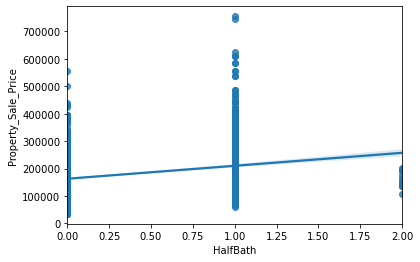

In [462]:
#Not great
sns.regplot(x = 'HalfBath', y = 'Property_Sale_Price', data = df)

In [463]:
df.drop('HalfBath', axis = 1, inplace = True)

In [464]:
df.columns

Index(['Dwell_Type', 'Zone_Class', 'LotFrontage', 'Road_Type', 'Neighborhood',
       'HouseStyle', 'OverallQual', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF', 'GrLivArea',
       'FullBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'Property_Sale_Price'],
      dtype='object')

<AxesSubplot:xlabel='BedroomAbvGr', ylabel='Property_Sale_Price'>

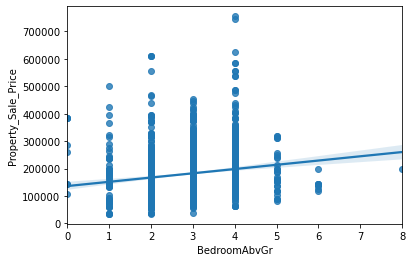

In [465]:
sns.regplot(x = 'BedroomAbvGr', y = 'Property_Sale_Price', data = df)

In [466]:
df.drop('BedroomAbvGr', axis = 1, inplace = True)

<AxesSubplot:xlabel='KitchenAbvGr', ylabel='Property_Sale_Price'>

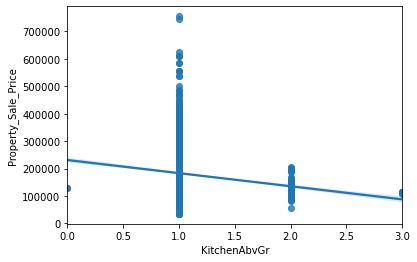

In [467]:
sns.regplot(x = 'KitchenAbvGr', y = 'Property_Sale_Price', data = df)

In [468]:
df.drop('KitchenAbvGr', axis = 1, inplace = True)

<AxesSubplot:xlabel='TotRmsAbvGrd', ylabel='Property_Sale_Price'>

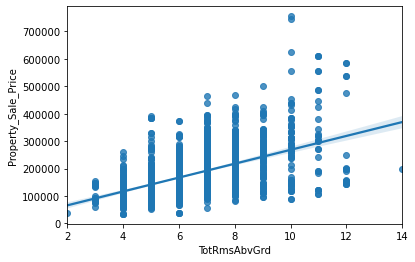

In [469]:
sns.regplot(x = 'TotRmsAbvGrd', y = 'Property_Sale_Price', data = df)

<AxesSubplot:xlabel='Functional', ylabel='Property_Sale_Price'>

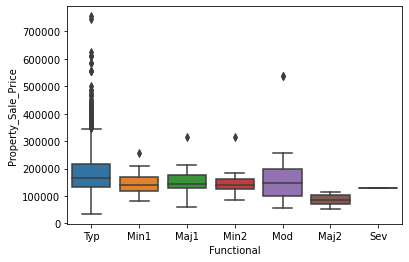

In [470]:
sns.boxplot(x = 'Functional', y = 'Property_Sale_Price', data = df)

In [471]:
df['Functional'].value_counts()

Typ     1935
Min1      49
Min2      47
Mod       18
Maj1      15
Maj2       6
Sev        1
Name: Functional, dtype: int64

In [472]:
df.drop('Functional', axis = 1, inplace = True)

<AxesSubplot:xlabel='Fireplaces', ylabel='Property_Sale_Price'>

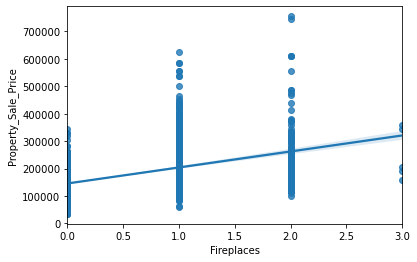

In [473]:
#Ok predictor, but not taking it
sns.regplot(x = 'Fireplaces', y = 'Property_Sale_Price', data = df)

In [474]:
df.drop('Fireplaces', axis = 1, inplace = True)

In [475]:
df.drop('FireplaceQu', axis = 1, inplace = True)

<AxesSubplot:xlabel='GarageType', ylabel='Property_Sale_Price'>

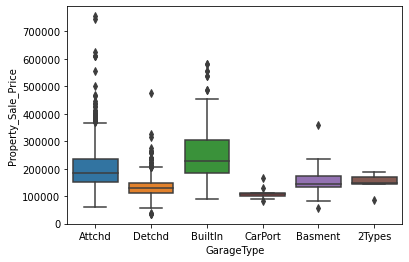

In [476]:
sns.boxplot(x = 'GarageType', y = 'Property_Sale_Price', data = df)

In [477]:
df['GarageType'].value_counts()

Attchd     1250
Detchd      537
BuiltIn     124
Basment      27
CarPort      12
2Types        8
Name: GarageType, dtype: int64

<AxesSubplot:xlabel='GarageYrBlt', ylabel='Property_Sale_Price'>

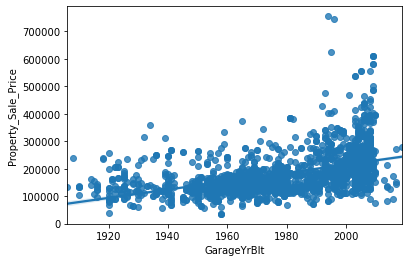

In [478]:
sns.regplot(x = 'GarageYrBlt', y = 'Property_Sale_Price', data = df)

In [479]:
df.drop('GarageYrBlt', axis = 1, inplace = True)

<AxesSubplot:xlabel='GarageCars', ylabel='Property_Sale_Price'>

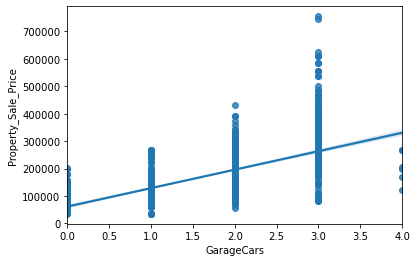

In [480]:
sns.regplot(x = 'GarageCars', y = 'Property_Sale_Price', data = df)

<AxesSubplot:xlabel='GarageArea', ylabel='Property_Sale_Price'>

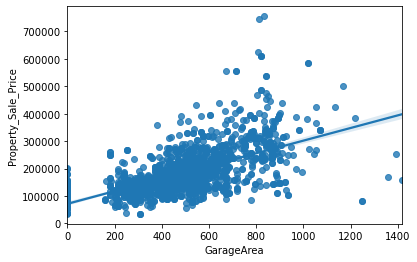

In [481]:
sns.regplot(x = 'GarageArea', y = 'Property_Sale_Price', data = df)

<AxesSubplot:xlabel='PavedDrive', ylabel='Property_Sale_Price'>

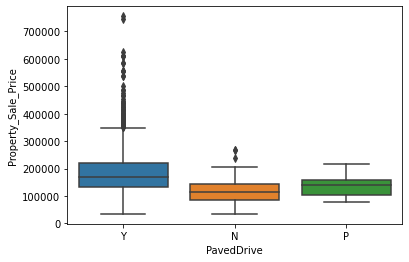

In [482]:
sns.boxplot(x = 'PavedDrive', y = 'Property_Sale_Price', data = df)

In [483]:
df['PavedDrive'].value_counts()

Y    1911
N     116
P      44
Name: PavedDrive, dtype: int64

In [484]:
df.drop('PavedDrive', axis = 1, inplace = True)

<AxesSubplot:xlabel='WoodDeckSF', ylabel='Property_Sale_Price'>

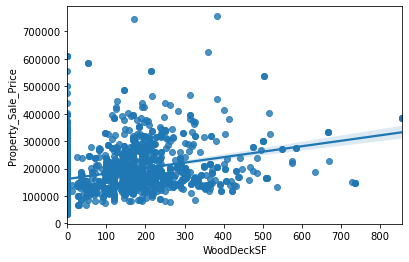

In [485]:
sns.regplot(x = 'WoodDeckSF', y = 'Property_Sale_Price', data = df)

In [486]:
df.drop('WoodDeckSF', axis = 1, inplace = True)

<AxesSubplot:xlabel='OpenPorchSF', ylabel='Property_Sale_Price'>

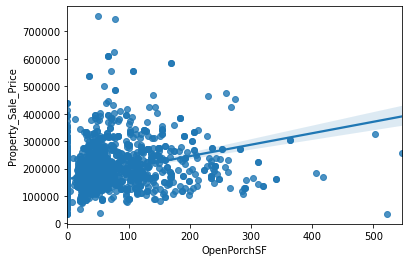

In [487]:
sns.regplot(x = 'OpenPorchSF', y = 'Property_Sale_Price', data = df)

In [488]:
df.drop('OpenPorchSF', axis = 1, inplace = True)

<AxesSubplot:xlabel='EnclosedPorch', ylabel='Property_Sale_Price'>

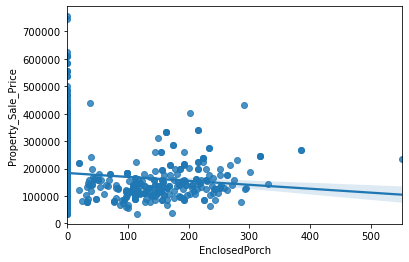

In [489]:
sns.regplot(x = 'EnclosedPorch', y = 'Property_Sale_Price', data = df)

In [490]:
df.drop('EnclosedPorch', axis = 1, inplace = True)

<AxesSubplot:xlabel='3SsnPorch', ylabel='Property_Sale_Price'>

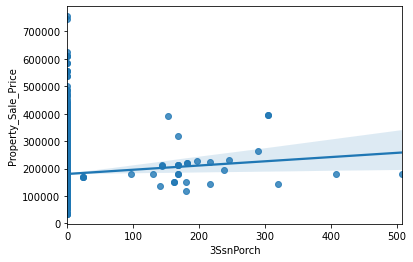

In [491]:
sns.regplot(x = '3SsnPorch', y = 'Property_Sale_Price', data = df)

In [492]:
df.drop('3SsnPorch', axis = 1, inplace = True)

<AxesSubplot:xlabel='ScreenPorch', ylabel='Property_Sale_Price'>

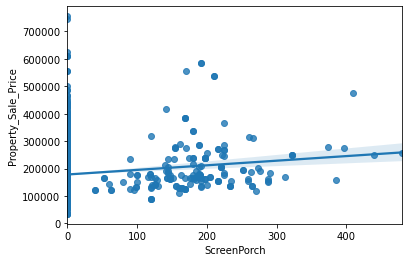

In [493]:
sns.regplot(x = 'ScreenPorch', y = 'Property_Sale_Price', data = df)

In [494]:
df.drop('ScreenPorch', axis = 1, inplace = True)

<AxesSubplot:xlabel='PoolArea', ylabel='Property_Sale_Price'>

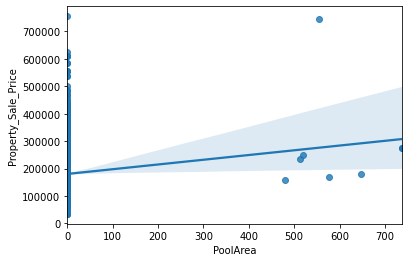

In [495]:
sns.regplot(x = 'PoolArea', y = 'Property_Sale_Price', data = df)

In [496]:
df.drop('PoolArea', axis = 1, inplace = True)

In [497]:
df['MiscVal'].unique()

array([    0,   700,   350,   500,   400,   480,   450, 15500,  1200,
         800,  2000,   600,  3500,  1300,    54,   620,   560,  1400,
        8300,  1150,  2500], dtype=int64)

<AxesSubplot:xlabel='MiscVal', ylabel='Property_Sale_Price'>

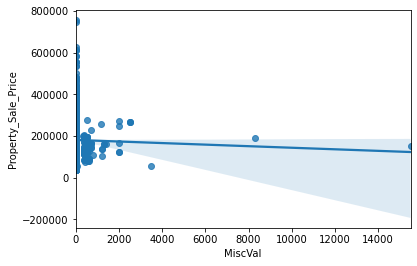

In [498]:
sns.regplot(x = 'MiscVal', y = 'Property_Sale_Price', data = df)

In [499]:
df.drop('MiscVal', axis = 1, inplace = True)

<AxesSubplot:xlabel='MoSold', ylabel='Property_Sale_Price'>

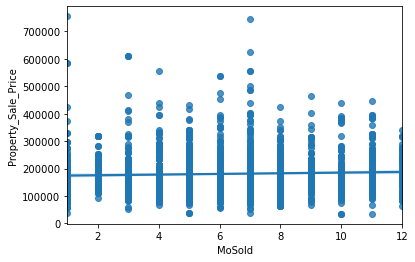

In [500]:
sns.regplot(x = 'MoSold', y = 'Property_Sale_Price', data = df)

In [501]:
df.drop('MoSold', axis = 1, inplace = True)

<AxesSubplot:xlabel='YrSold', ylabel='Property_Sale_Price'>

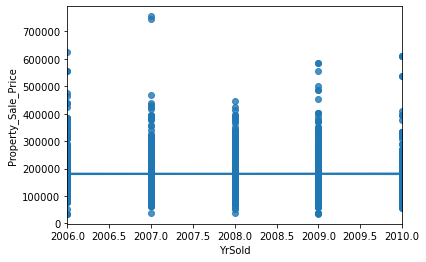

In [502]:
sns.regplot(x = 'YrSold', y = 'Property_Sale_Price', data = df)

In [503]:
df.drop('YrSold', axis = 1, inplace = True)

<AxesSubplot:xlabel='SaleType', ylabel='Property_Sale_Price'>

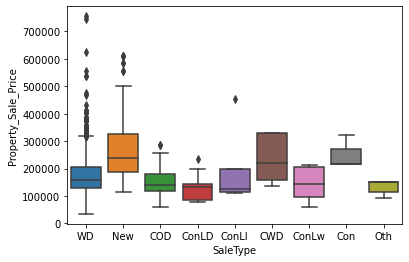

In [504]:
#good enough
sns.boxplot(x = 'SaleType', y = 'Property_Sale_Price', data = df)

In [558]:
df.drop('SaleType', axis = 1, inplace = True)

<AxesSubplot:xlabel='SaleCondition', ylabel='Property_Sale_Price'>

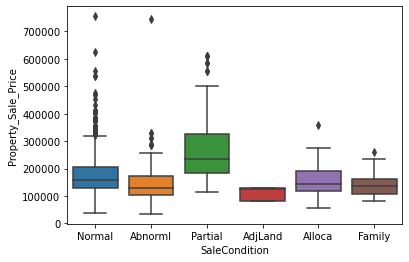

In [505]:
sns.boxplot(x = 'SaleCondition', y = 'Property_Sale_Price', data = df)

In [506]:
df['SaleCondition'].value_counts()

Normal     1693
Partial     175
Abnorml     155
Family       24
Alloca       19
AdjLand       5
Name: SaleCondition, dtype: int64

In [557]:
df.drop('SaleCondition', axis = 1, inplace = True)

In [507]:
df.corr()

,Dwell_Type,LotFrontage,OverallQual,MasVnrArea,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,Property_Sale_Price
Dwell_Type,1.000000,-0.290370,0.033342,0.019278,-0.229835,-0.237715,0.078656,0.151025,0.050605,-0.033713,-0.095349,-0.078439
LotFrontage,-0.290370,1.000000,0.110045,0.127071,0.283855,0.356494,0.320824,0.175830,0.294955,0.232831,0.267843,0.279260
OverallQual,0.033342,0.110045,1.000000,0.287667,0.355887,0.310484,0.401647,0.382917,0.272734,0.401118,0.375053,0.524946
MasVnrArea,0.019278,0.127071,0.287667,1.000000,0.345414,0.320490,0.389593,0.281490,0.275756,0.355381,0.359665,0.481873
TotalBsmtSF,-0.229835,0.283855,0.355887,0.345414,1.000000,0.788935,0.424664,0.313792,0.252811,0.422394,0.468459,0.618681
1stFlrSF,-0.237715,0.356494,0.310484,0.320490,0.788935,1.000000,0.546321,0.370793,0.396917,0.432926,0.475318,0.600057
GrLivArea,0.078656,0.320824,0.401647,0.389593,0.424664,0.546321,1.000000,0.616823,0.822300,0.464404,0.466435,0.711034
FullBath,0.151025,0.175830,0.382917,0.281490,0.313792,0.370793,0.616823,1.000000,0.548245,0.453400,0.385617,0.549169
TotRmsAbvGrd,0.050605,0.294955,0.272734,0.275756,0.252811,0.396917,0.822300,0.548245,1.000000,0.349320,0.328838,0.523753
GarageCars,-0.033713,0.232831,0.401118,0.355381,0.422394,0.432926,0.464404,0.453400,0.349320,1.000000,0.880654,0.633745


In [508]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2071 entries, 0 to 2072
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Dwell_Type           2071 non-null   float64
 1   Zone_Class           2071 non-null   object 
 2   LotFrontage          1751 non-null   float64
 3   Road_Type            2071 non-null   object 
 4   Neighborhood         2071 non-null   object 
 5   HouseStyle           2071 non-null   object 
 6   OverallQual          2071 non-null   int64  
 7   MasVnrType           2057 non-null   object 
 8   MasVnrArea           2057 non-null   float64
 9   ExterQual            2071 non-null   object 
 10  ExterCond            2071 non-null   object 
 11  BsmtQual             2012 non-null   object 
 12  BsmtCond             2012 non-null   object 
 13  BsmtExposure         2010 non-null   object 
 14  BsmtFinType1         2012 non-null   object 
 15  BsmtFinType2         2011 non-null   o

In [515]:
df = df.replace(['Ex', 'Gd', 'TA', 'Fa', 'Po', 'NA'], [5,4,3,2,1,0])

In [511]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2071 entries, 0 to 2072
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Dwell_Type           2071 non-null   float64
 1   Zone_Class           2071 non-null   object 
 2   LotFrontage          1751 non-null   float64
 3   Road_Type            2071 non-null   object 
 4   Neighborhood         2071 non-null   object 
 5   HouseStyle           2071 non-null   object 
 6   OverallQual          2071 non-null   int64  
 7   MasVnrType           2057 non-null   object 
 8   MasVnrArea           2057 non-null   float64
 9   ExterQual            2071 non-null   object 
 10  ExterCond            2071 non-null   object 
 11  BsmtQual             2012 non-null   object 
 12  BsmtCond             2012 non-null   object 
 13  BsmtExposure         2010 non-null   object 
 14  BsmtFinType1         2012 non-null   object 
 15  BsmtFinType2         2011 non-null   o

In [512]:
df = df.replace(['GLQ', 'ALQ', 'BLQ', 'Rec', 'LwQ', 'Unf', 'NA'], [6,5,4,3,2,1,0])

In [518]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2071 entries, 0 to 2072
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Dwell_Type           2071 non-null   float64
 1   Zone_Class           2071 non-null   object 
 2   LotFrontage          1751 non-null   float64
 3   Road_Type            2071 non-null   object 
 4   Neighborhood         2071 non-null   object 
 5   HouseStyle           2071 non-null   object 
 6   OverallQual          2071 non-null   int64  
 7   MasVnrType           2057 non-null   object 
 8   MasVnrArea           2057 non-null   float64
 9   ExterQual            2071 non-null   int64  
 10  ExterCond            2071 non-null   int64  
 11  BsmtQual             2012 non-null   float64
 12  BsmtCond             2012 non-null   float64
 13  BsmtExposure         2010 non-null   float64
 14  BsmtFinType1         2012 non-null   float64
 15  BsmtFinType2         2011 non-null   f

In [517]:
df = df.replace(['Av', 'Mn', 'No'], [3,2,1])

<AxesSubplot:xlabel='BsmtQual', ylabel='Property_Sale_Price'>

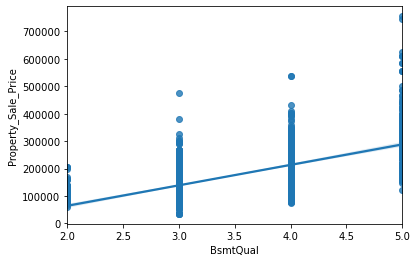

In [519]:
sns.regplot(x = 'BsmtQual', y = 'Property_Sale_Price', data = df)

In [520]:
df.corr()

,Dwell_Type,LotFrontage,OverallQual,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,...,1stFlrSF,GrLivArea,FullBath,KitchenQual,TotRmsAbvGrd,GarageCars,GarageArea,GarageQual,GarageCond,Property_Sale_Price
Dwell_Type,1.000000,-0.290370,0.033342,0.019278,0.010878,-0.074035,0.082086,0.001300,0.050869,0.037783,...,-0.237715,0.078656,0.151025,-0.016606,0.050605,-0.033713,-0.095349,0.035253,-0.000864,-0.078439
LotFrontage,-0.290370,1.000000,0.110045,0.127071,0.125452,-0.015856,0.130306,0.020769,0.133518,0.035936,...,0.356494,0.320824,0.175830,0.142432,0.294955,0.232831,0.267843,0.037192,0.034622,0.279260
OverallQual,0.033342,0.110045,1.000000,0.287667,0.488858,0.022022,0.448200,0.120180,0.160180,0.139784,...,0.310484,0.401647,0.382917,0.450248,0.272734,0.401118,0.375053,0.086470,0.092711,0.524946
MasVnrArea,0.019278,0.127071,0.287667,1.000000,0.342021,-0.011771,0.303898,0.047081,0.123762,0.162528,...,0.320490,0.389593,0.281490,0.288742,0.275756,0.355381,0.359665,0.071115,0.053245,0.481873
ExterQual,0.010878,0.125452,0.488858,0.342021,1.000000,0.019214,0.623400,0.179224,0.216178,0.202013,...,0.395045,0.432075,0.467615,0.714883,0.285177,0.512937,0.479375,0.094691,0.083996,0.686021
ExterCond,-0.074035,-0.015856,0.022022,-0.011771,0.019214,1.000000,-0.093896,0.131611,-0.029770,0.021449,...,0.005755,0.022679,-0.013640,0.057238,0.002976,-0.018067,0.015815,0.060046,0.096526,0.018817
BsmtQual,0.082086,0.130306,0.448200,0.303898,0.623400,-0.093896,1.000000,0.221296,0.315999,0.265686,...,0.367404,0.369368,0.497358,0.571918,0.213921,0.515244,0.450435,0.145910,0.144192,0.641649
BsmtCond,0.001300,0.020769,0.120180,0.047081,0.179224,0.131611,0.221296,1.000000,0.088491,0.128487,...,0.073270,0.056129,0.135380,0.141490,0.024767,0.133591,0.121498,0.093044,0.094657,0.158582
BsmtExposure,0.050869,0.133518,0.160180,0.123762,0.216178,-0.029770,0.315999,0.088491,1.000000,0.273508,...,0.284743,0.096599,0.108488,0.240032,0.020137,0.235493,0.235167,0.070406,0.049496,0.339992
BsmtFinType1,0.037783,0.035936,0.139784,0.162528,0.202013,0.021449,0.265686,0.128487,0.273508,1.000000,...,0.199385,0.035026,0.060983,0.221846,-0.083561,0.169722,0.194243,0.134194,0.126828,0.268137


In [522]:
df.drop(['GarageCond', 'GarageQual', 'HeatingQC', 'BsmtFinType2', 'BsmtFinType2', 'BsmtExposure', 'BsmtCond', 'ExterCond', 'LotFrontage'], axis = 1, inplace = True)

In [523]:
df.corr()

,Dwell_Type,OverallQual,MasVnrArea,ExterQual,BsmtQual,BsmtFinType1,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,KitchenQual,TotRmsAbvGrd,GarageCars,GarageArea,Property_Sale_Price
Dwell_Type,1.000000,0.033342,0.019278,0.010878,0.082086,0.037783,-0.229835,-0.237715,0.078656,0.151025,-0.016606,0.050605,-0.033713,-0.095349,-0.078439
OverallQual,0.033342,1.000000,0.287667,0.488858,0.448200,0.139784,0.355887,0.310484,0.401647,0.382917,0.450248,0.272734,0.401118,0.375053,0.524946
MasVnrArea,0.019278,0.287667,1.000000,0.342021,0.303898,0.162528,0.345414,0.320490,0.389593,0.281490,0.288742,0.275756,0.355381,0.359665,0.481873
ExterQual,0.010878,0.488858,0.342021,1.000000,0.623400,0.202013,0.475311,0.395045,0.432075,0.467615,0.714883,0.285177,0.512937,0.479375,0.686021
BsmtQual,0.082086,0.448200,0.303898,0.623400,1.000000,0.265686,0.447873,0.367404,0.369368,0.497358,0.571918,0.213921,0.515244,0.450435,0.641649
BsmtFinType1,0.037783,0.139784,0.162528,0.202013,0.265686,1.000000,0.239482,0.199385,0.035026,0.060983,0.221846,-0.083561,0.169722,0.194243,0.268137
TotalBsmtSF,-0.229835,0.355887,0.345414,0.475311,0.447873,0.239482,1.000000,0.788935,0.424664,0.313792,0.446196,0.252811,0.422394,0.468459,0.618681
1stFlrSF,-0.237715,0.310484,0.320490,0.395045,0.367404,0.199385,0.788935,1.000000,0.546321,0.370793,0.387289,0.396917,0.432926,0.475318,0.600057
GrLivArea,0.078656,0.401647,0.389593,0.432075,0.369368,0.035026,0.424664,0.546321,1.000000,0.616823,0.411280,0.822300,0.464404,0.466435,0.711034
FullBath,0.151025,0.382917,0.281490,0.467615,0.497358,0.060983,0.313792,0.370793,0.616823,1.000000,0.421555,0.548245,0.453400,0.385617,0.549169


In [526]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2071 entries, 0 to 2072
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Dwell_Type           2071 non-null   float64
 1   Zone_Class           2071 non-null   object 
 2   Road_Type            2071 non-null   object 
 3   HouseStyle           2071 non-null   object 
 4   OverallQual          2071 non-null   int64  
 5   MasVnrType           2057 non-null   object 
 6   MasVnrArea           2057 non-null   float64
 7   ExterQual            2071 non-null   int64  
 8   BsmtQual             2012 non-null   float64
 9   BsmtFinType1         2012 non-null   float64
 10  TotalBsmtSF          2071 non-null   int64  
 11  1stFlrSF             2071 non-null   int64  
 12  GrLivArea            2071 non-null   int64  
 13  FullBath             2071 non-null   int64  
 14  KitchenQual          2071 non-null   int64  
 15  TotRmsAbvGrd         2071 non-null   i

In [527]:
df['BsmtQual'].unique()

array([ 4.,  3.,  5., nan,  2.])

In [529]:
modeBs = df['BsmtQual'].value_counts().idxmax()
df['BsmtQual'] = df['BsmtQual'].fillna(modeBs)

In [531]:
df['MasVnrType'].unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn', nan], dtype=object)

In [532]:
modeMV = df['MasVnrType'].value_counts().idxmax()
df['MasVnrType'] = df['MasVnrType'].fillna(modeMV)

In [533]:
df['BsmtFinType1'].unique()

array([ 6.,  5.,  1.,  3.,  4., nan,  2.])

In [534]:
modeBf = df['BsmtFinType1'].value_counts().idxmax()
df['BsmtFinType1'] = df['BsmtFinType1'].fillna(modeBf)

In [545]:
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].mean())

In [536]:
df['GarageType'].unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', nan, 'Basment', '2Types'],
      dtype=object)

In [537]:
modeGt = df['GarageType'].value_counts().idxmax()
df['GarageType'] = df['GarageType'].fillna(modeGt)

In [538]:
modeFi = df['GarageFinish'].value_counts().idxmax()
df['GarageFinish'] = df['GarageFinish'].fillna(modeFi)

In [546]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2071 entries, 0 to 2072
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Dwell_Type           2071 non-null   float64
 1   Zone_Class           2071 non-null   object 
 2   Road_Type            2071 non-null   object 
 3   HouseStyle           2071 non-null   object 
 4   OverallQual          2071 non-null   int64  
 5   MasVnrType           2071 non-null   object 
 6   MasVnrArea           2071 non-null   float64
 7   ExterQual            2071 non-null   int64  
 8   BsmtQual             2071 non-null   float64
 9   BsmtFinType1         2071 non-null   float64
 10  TotalBsmtSF          2071 non-null   int64  
 11  1stFlrSF             2071 non-null   int64  
 12  GrLivArea            2071 non-null   int64  
 13  FullBath             2071 non-null   int64  
 14  KitchenQual          2071 non-null   int64  
 15  TotRmsAbvGrd         2071 non-null   i

In [563]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2071 entries, 0 to 2072
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Road_Type            2071 non-null   int32  
 1   HouseStyle           2071 non-null   object 
 2   OverallQual          2071 non-null   int64  
 3   MasVnrType           2071 non-null   object 
 4   MasVnrArea           2071 non-null   float64
 5   ExterQual            2071 non-null   int64  
 6   BsmtQual             2071 non-null   float64
 7   BsmtFinType1         2071 non-null   float64
 8   TotalBsmtSF          2071 non-null   int64  
 9   1stFlrSF             2071 non-null   int64  
 10  GrLivArea            2071 non-null   int64  
 11  FullBath             2071 non-null   int64  
 12  KitchenQual          2071 non-null   int64  
 13  TotRmsAbvGrd         2071 non-null   int64  
 14  GarageType           2071 non-null   object 
 15  GarageFinish         2071 non-null   o

In [547]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer

le = LabelEncoder()


In [548]:
df['Road_Type'] = le.fit_transform(df['Road_Type'])

In [564]:
#ct = ColumnTransformer([('encoder', OneHotEncoder(), [1,3,14,15])], remainder = 'passthrough')

In [566]:
#df = pd.DataFrame(ct.fit_transform(df))

In [567]:
df.drop(['HouseStyle', 'MasVnrType', 'GarageType', 'GarageFinish'], axis = 1, inplace = True)

In [568]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2071 entries, 0 to 2072
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Road_Type            2071 non-null   int32  
 1   OverallQual          2071 non-null   int64  
 2   MasVnrArea           2071 non-null   float64
 3   ExterQual            2071 non-null   int64  
 4   BsmtQual             2071 non-null   float64
 5   BsmtFinType1         2071 non-null   float64
 6   TotalBsmtSF          2071 non-null   int64  
 7   1stFlrSF             2071 non-null   int64  
 8   GrLivArea            2071 non-null   int64  
 9   FullBath             2071 non-null   int64  
 10  KitchenQual          2071 non-null   int64  
 11  TotRmsAbvGrd         2071 non-null   int64  
 12  GarageCars           2071 non-null   int64  
 13  GarageArea           2071 non-null   int64  
 14  Property_Sale_Price  2071 non-null   int64  
dtypes: float64(3), int32(1), int64(11)
mem

In [569]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [570]:
from sklearn import linear_model 


In [619]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 3)

In [620]:
regr = linear_model.LinearRegression()

In [621]:
regr.fit(X_train, y_train)

LinearRegression()

In [622]:
print(regr.coef_)
print(regr.intercept_)

[-1.17299826e+03  2.60445947e+03  3.91077015e+01  1.75215664e+04
  1.77787881e+04  3.22329212e+03  2.70876464e+01 -7.23472736e-01
  5.41353264e+01 -4.03425692e+03  1.81795500e+04  1.13318670e+03
  1.03687000e+04  1.29050079e+01]
-172917.70952716816


In [623]:
y_pred = regr.predict(X_test)

In [624]:
from sklearn.metrics import mean_squared_error, r2_score
print("MSE", mean_squared_error(y_test,y_pred))
print("R2" ,r2_score(y_test, y_pred))

MSE 884690645.7264352
R2 0.8351499191522272


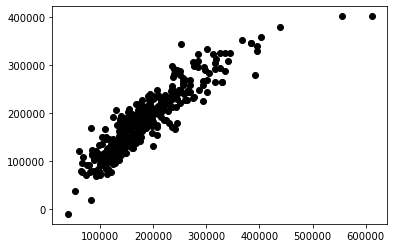

In [625]:
import matplotlib.pyplot as plt
# Plot outputs
plt.scatter(y_test, y_pred,  color='black')

In [626]:
y_pred = regr.predict(X_train)
print("R2 Score of training set --> ", r2_score(y_train, y_pred))

R2 Score of training set -->  0.7925065395072655
